# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
import json
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from citipy import citipy
from pprint import pprint
from api_keys import weather_api_key

## Generate Cities List

In [3]:
lat_range = (-90, 90)
lng_range = (-180, 180)
lat_lngs = []
cities = []

lats = np.random.uniform(lat_range[0], lat_range[1], size = 1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
weather_log = []

for city in cities:
    city_url = f"{url}units={units}&appid={weather_api_key}&q={city}"
    response = requests.get(city_url)
    weather_json = response.json()
    
    try:
        id = weather_json["id"]
    except:
        print("ID doesn't exist")
    
    try:
        name = weather_json["name"]
    except:
        print("Name doesn't exist")
        
    try:
        cloud = weather_json["clouds"]["all"]
        country = weather_json["sys"]["country"]
        date = weather_json["dt"]
        humidity = weather_json["main"]["humidity"]
        lat = weather_json["coord"]["lat"]
        lng = weather_json["coord"]["lon"]
        max_temp = weather_json["main"]["temp_max"]
        wind_speed = weather_json["wind"]["speed"]
    except:
        print()
        
    weather_dict = {"City_ID": id, "City": name, "Cloudiness": cloud, "Country": country, 
                    "Date": date, "Humidity": humidity, "Lat": lat, "Lng": lng,
                    "Max Temp": max_temp, "Wind Speed": wind_speed}
    weather_log.append(weather_dict)
    
    pprint(f"{id} {name}")

'2112802 Hasaki'
'2075265 Busselton'
'4021858 Guerrero Negro'
'3652764 Puerto Ayora'
'2022572 Khatanga'
'4035715 Avarua'
'2180815 Tuatapere'
'1045114 Inhambane'
'2033536 Yakeshi'
'5364271 Laguna'
'6185377 Yellowknife'
'672343 Negru Vodă'
'6170031 Tuktoyaktuk'
'5880054 Barrow'
'5848280 Kapaa'
'4030556 Rikitea'
'3430863 Mar del Plata'
ID doesn't exist
Name doesn't exist

'3430863 Mar del Plata'
'5983607 Inuvik'
'2618795 Klaksvík'
ID doesn't exist
Name doesn't exist

'2618795 Klaksvík'
'2109701 Auki'
'6201424 Mataura'
'4018227 Ciudad de Armería'
'2126199 Cherskiy'
'2063036 Port Lincoln'
'2156643 Mount Gambier'
'2110227 Butaritari'
'2027044 Batagay'
'1516048 Khovd'
'3466165 Cidreira'
'2644210 Liverpool'
'155052 Malangali'
'556268 Ostrovnoy'
'5122534 Jamestown'
'1015776 Bredasdorp'
ID doesn't exist
Name doesn't exist

'1015776 Bredasdorp'
'4032369 Pangai'
'2123814 Leningradskiy'
'2126710 Beringovskiy'
'591632 Kärdla'
'2398430 Mimongo'
ID doesn't exist
Name doesn't exist

'2398430 Mimongo'
'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_data = pd.DataFrame(weather_log)
write = weather_data.to_csv("output_data/output.csv")

weather_data

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,2112802,Hasaki,91,JP,1655102340,64,35.7333,140.8333,73.29,13.38
1,2075265,Busselton,85,AU,1655102479,69,-33.6500,115.3333,61.07,15.77
2,4021858,Guerrero Negro,29,MX,1655102479,92,27.9769,-114.0611,63.64,12.71
3,3652764,Puerto Ayora,86,EC,1655102480,91,-0.7393,-90.3518,71.55,1.01
4,2022572,Khatanga,100,RU,1655102480,27,71.9667,102.5000,72.30,5.59
...,...,...,...,...,...,...,...,...,...,...
609,2194098,Ahipara,31,NZ,1655102792,71,-35.1667,173.1667,56.86,22.68
610,935214,Saint-Pierre,75,RE,1655102793,88,-21.3393,55.4781,71.91,24.16
611,2206874,Waipawa,10,NZ,1655102793,79,-41.4122,175.5153,47.59,14.12
612,2155562,Nelson Bay,1,AU,1655102794,82,-32.7167,152.1500,60.01,1.01


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [22]:
weather_data["Humidity"].max()

100

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

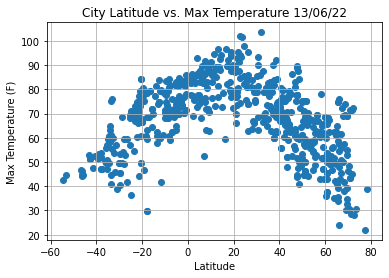

In [163]:
plot_lat = weather_data["Lat"]
plot_max_temp = weather_data["Max Temp"]
plt.scatter(plot_lat, plot_max_temp)
plt.title("City Latitude vs. Max Temperature 13/06/22")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("output_data/Fig1.png")

All Latitude values of each city along with their corresponding max temperatures have been extracted. This is measuring the max temperatures of places arranged in how far away they are from the equator.

## Latitude vs. Humidity Plot

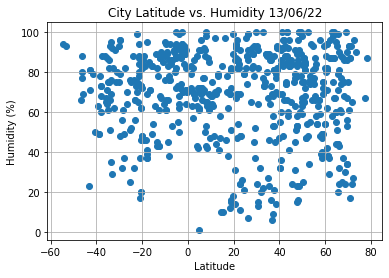

In [164]:
plot_humidity = weather_data["Humidity"]
plt.scatter(plot_lat, plot_humidity)
plt.title("City Latitude vs. Humidity 13/06/22")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("output_data/Fig2.png")

All Latitude values of each city along with their corresponding humidity have been extracted. This is measuring the humidity of places arranged in how far away they are from the equator.

## Latitude vs. Cloudiness Plot

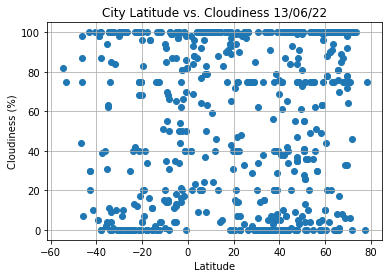

In [165]:
plot_clouds = weather_data["Cloudiness"]
plt.scatter(plot_lat, plot_clouds)
plt.title("City Latitude vs. Cloudiness 13/06/22")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("output_data/Fig3.png")

All Latitude values of each city along with their corresponding cloudiness have been extracted. This is measuring the cloudiness of places arranged in how far away they are from the equator.

## Latitude vs. Wind Speed Plot

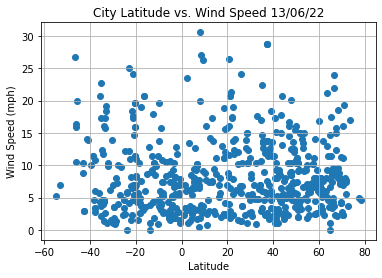

In [166]:
plot_wind_speed = weather_data["Wind Speed"]
plt.scatter(plot_lat, plot_wind_speed)
plt.title("City Latitude vs. Wind Speed 13/06/22")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("output_data/Fig4.png")

All Latitude values of each city along with their corresponding wind speeds have been extracted. This is measuring the wind speed of places arranged in how far away they are from the equator.

## Linear Regression

In [87]:
north_lat_filter = weather_data[weather_data["Lat"] >= 0]
south_lat_filter = weather_data[weather_data["Lat"] < 0]
north_lat = north_lat_filter["Lat"]
south_lat = south_lat_filter["Lat"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.7222833861438582


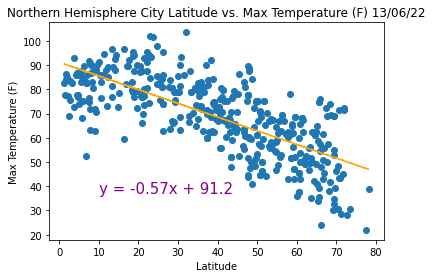

In [151]:
north_max_temp = north_lat_filter["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat, north_max_temp)
regress_values = north_lat * slope + intercept
line_eq1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_lat, north_max_temp)
plt.plot(north_lat, regress_values, linestyle="dashed", c="orange")
plt.title("Northern Hemisphere City Latitude vs. Max Temperature (F) 13/06/22")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.annotate(line_eq1,(10,37),fontsize=15,color="purple")
plt.savefig("output_data/Fig5.png")

correlation = st.pearsonr(north_lat, north_max_temp)
print(f"The r-value is: {correlation[0]}")
plt.show()

Cities closer to the North Pole have colder max temperatures compared to cities furthest away from the North Pole.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7044961979646353


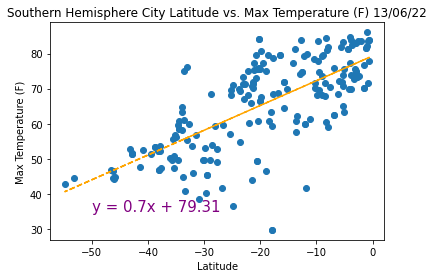

In [162]:
south_max_temp = south_lat_filter["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat, south_max_temp)
regress_values = south_lat * slope + intercept
line_eq1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south_lat, south_max_temp)
plt.plot(south_lat, regress_values, linestyle="dashed", c="orange")
plt.title("Southern Hemisphere City Latitude vs. Max Temperature (F) 13/06/22")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.annotate(line_eq1,(-50,35),fontsize=15,color="purple")
plt.savefig("output_data/Fig6.png")

correlation2 = st.pearsonr(south_lat, south_max_temp)
print(f"The r-value is: {correlation2[0]}")

plt.show()

Cities closer to the South Pole have colder max temperatures compared to cities furthest away from the South Pole.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.016303464279449387


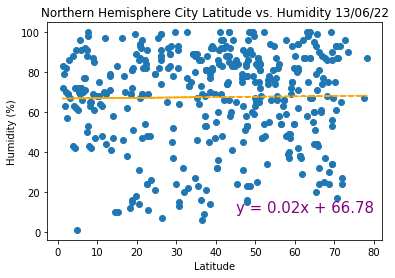

In [161]:
north_humidity = north_lat_filter["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat, north_humidity)
regress_values = north_lat * slope + intercept
line_eq1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_lat, north_humidity)
plt.plot(north_lat, regress_values, linestyle="dashed", c="orange")
plt.title("Northern Hemisphere City Latitude vs. Humidity 13/06/22")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq1,(45,10),fontsize=15,color="purple")
plt.savefig("output_data/Fig7.png")

correlation3 = st.pearsonr(north_lat, north_humidity)
print(f"The r-value is: {correlation3[0]}")

plt.show()

There is an extremely weak correlation between the city's latitude and its humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.15503352013060345


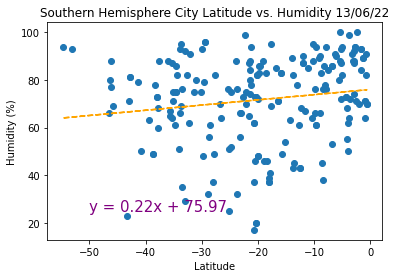

In [160]:
south_humidity = south_lat_filter["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat, south_humidity)
regress_values = south_lat * slope + intercept
line_eq1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south_lat, south_humidity)
plt.plot(south_lat, regress_values, linestyle="dashed", c="orange")
plt.title("Southern Hemisphere City Latitude vs. Humidity 13/06/22")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq1,(-50,25),fontsize=15,color="purple")
plt.savefig("output_data/Fig8.png")

correlation4 = st.pearsonr(south_lat, south_humidity)
print(f"The r-value is: {correlation4[0]}")

plt.show()

There is an extremely weak correlation between the city's latitude and its humidity although there is a slight increase in humidity as it gets closer to the equator. Since there are only 200 cities being sampled from the Southern Hemisphere the results are not as accurate as the Northern Hemisphere data.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.03325037069627836


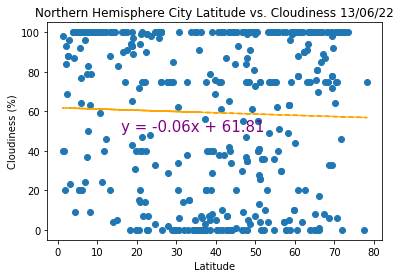

In [159]:
north_cloud = north_lat_filter["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat, north_cloud)
regress_values = north_lat * slope + intercept
line_eq1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_lat, north_cloud)
plt.plot(north_lat, regress_values, linestyle="dashed", c="orange")
plt.title("Northern Hemisphere City Latitude vs. Cloudiness 13/06/22")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq1,(16,50),fontsize=15,color="purple")
plt.savefig("output_data/Fig9.png")

correlation5 = st.pearsonr(north_lat, north_cloud)
print(f"The r-value is: {correlation5[0]}")

plt.show()

There is no correlation between the city's latitude and its cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0397525354342704


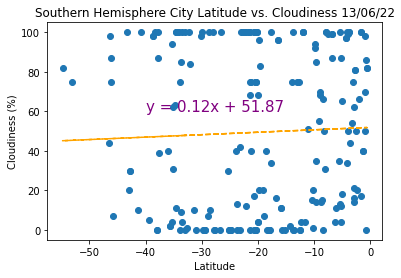

In [158]:
south_cloud = south_lat_filter["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat, south_cloud)
regress_values = south_lat * slope + intercept
line_eq1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south_lat, south_cloud)
plt.plot(south_lat, regress_values, linestyle="dashed", c="orange")
plt.title("Southern Hemisphere City Latitude vs. Cloudiness 13/06/22")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq1,(-40,60),fontsize=15,color="purple")
plt.savefig("output_data/Fig10.png")

correlation6 = st.pearsonr(south_lat, south_cloud)
print(f"The r-value is: {correlation6[0]}")

plt.show()

There is an extremely weak correlation between the city's latitude and its humidity. Since there are only 200 cities being sampled from the Southern Hemisphere the results are not as accurate as the Northern Hemisphere data.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.010657884513166703


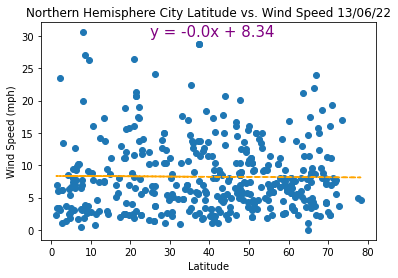

In [157]:
north_wind = north_lat_filter["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat, north_wind)
regress_values = north_lat * slope + intercept
line_eq1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_lat, north_wind)
plt.plot(north_lat, regress_values, linestyle="dashed", c="orange")
plt.title("Northern Hemisphere City Latitude vs. Wind Speed 13/06/22")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq1,(25,30),fontsize=15,color="purple")
plt.savefig("output_data/Fig11.png")

correlation7 = st.pearsonr(north_lat, north_wind)
print(f"The r-value is: {correlation7[0]}")

plt.show()

There is no correlation between the city's latitude and its wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.22462191041335422


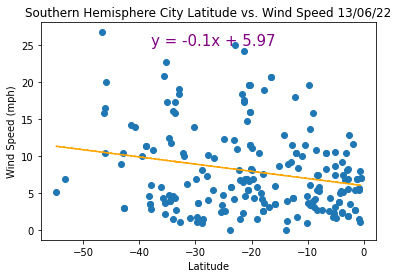

In [156]:
south_wind = south_lat_filter["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat, south_wind)
regress_values = south_lat * slope + intercept
line_eq1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south_lat, south_wind)
plt.plot(south_lat, regress_values, linestyle="dashed", c="orange")
plt.title("Southern Hemisphere City Latitude vs. Wind Speed 13/06/22")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq1,(-38,25),fontsize=15,color="purple")
plt.savefig("output_data/Fig12.png")

correlation8 = st.pearsonr(south_lat, south_wind)
print(f"The r-value is: {correlation8[0]}")

plt.show()

There is a very weak correlation between the city's latitude and its wind speed. This is showing that the wind seems to move faster the closer it gets to the South Pole. Since there are only 200 cities being sampled from the Southern Hemisphere the results are not as accurate as the Northern Hemisphere data.
